# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Custom Functions

In [3]:
def plt_dgt(dgt, shp=(8, 8), ntrp='none'):
    '''
    Plot digit image
    '''    
    # reshape digit array
    shpd_dgt = dgt.reshape(shp[0], shp[1])
    # plot image of digit
    plt.imshow(shpd_dgt, interpolation=ntrp)

# Plot Settings

In [4]:
plt.rc('image', cmap='binary') # use black/white palette for plotting

# Data

## 8x8 Digits
Handwritten digits dataset with 8x8 (64 pixel) resolution

In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
X = digits.data
y = digits.target
classes = digits.target_names

In [8]:
# sample features
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

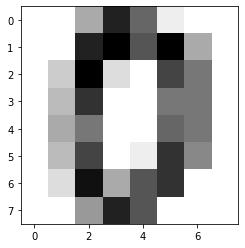

In [9]:
# sample feature image
plt_dgt(X[0])

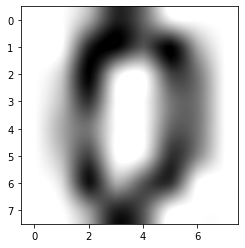

In [10]:
# sample observation image
plt_dgt(X[0], ntrp='spline16')

In [11]:
# sample target
y[0]

0

## 28x28 Digits
Handwritten digits dataset with 28x28 (784 pixel) resolution

In [12]:
from sklearn.datasets import fetch_mldata

In [13]:
mnist = fetch_mldata("MNIST original")
mnist.data.shape

(70000, 784)

In [14]:
# total number of samples for modeling
n = 2500
# step to sample through data
step = int(len(mnist.target) / n)

In [15]:
# use subset of data for analysis
X = mnist.data[0::step]
y = mnist.target[0::step]
classes = np.unique(y).astype(int)

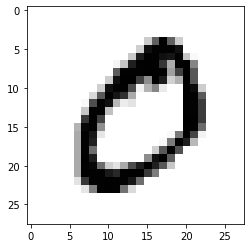

In [16]:
plt_dgt(X[0], (28, 28))

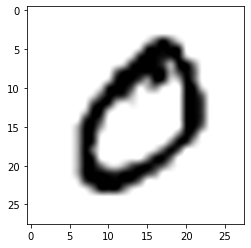

In [17]:
plt_dgt(X[0], (28, 28), ntrp='spline16')

In [18]:
y[0]

0.0

### Train/Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Random Forest

## Initial Model

In [20]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
# train score
rf.score(X_train, y_train)

0.9978666666666667

In [29]:
# test score
rf.score(X_test, y_test)

0.8528

In [23]:
# predictions
rf_pred = rf.predict(X_test)
# confusion matrix
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
# percentages by row
pct_cm = np.round(rf_cm / rf_cm.sum(axis=1)[:, None]*100, 1)
pct_cm

array([[93. ,  0. ,  0. ,  1.8,  0. ,  0. ,  0. ,  0. ,  5.3,  0. ],
       [ 0. , 96.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  3.2,  0. ],
       [ 0. ,  0. , 92.2,  1.6,  1.6,  0. ,  1.6,  0. ,  3.1,  0. ],
       [ 5.1,  1.7,  3.4, 81.4,  0. ,  3.4,  0. ,  0. ,  5.1,  0. ],
       [ 2.4,  1.2,  1.2,  0. , 83.3,  0. ,  2.4,  0. ,  2.4,  7.1],
       [ 4. ,  6. ,  0. , 12. ,  0. , 66. ,  4. ,  2. ,  4. ,  2. ],
       [ 0. ,  0. ,  0. ,  1.7,  5.2,  1.7, 87.9,  1.7,  1.7,  0. ],
       [ 0. ,  1.4,  4.1,  1.4,  1.4,  1.4,  0. , 87.8,  0. ,  2.7],
       [ 0. ,  6.1,  9.1,  1.5,  1.5,  1.5,  3. ,  0. , 75.8,  1.5],
       [ 2. ,  2. ,  0. ,  0. ,  6. ,  0. ,  2. ,  2. ,  0. , 86. ]])

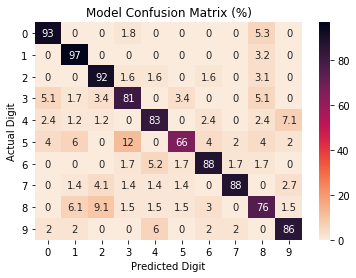

In [26]:
with sns.plotting_context(font_scale=3.2):
    sns_ax = sns.heatmap(pct_cm, cmap=sns.cm.rocket_r, annot=True)
    sns_ax.set(title='Model Confusion Matrix (%)', 
               xticklabels=(classes), yticklabels=(classes),
               xlabel='Predicted Digit', ylabel='Actual Digit'
              )
plt.yticks(rotation=0);

## Tuned Model

### Hyperparameters

In [43]:
# number of trees in random forest
n_estimators = [10, 100, 500]
# maximum number of levels in tree
max_depth = [None, 3, 10]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 5]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [44]:
# define hyperparameter dictionary
hyperparams = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth,
    'bootstrap': bootstrap
}

In [45]:
rf = RandomForestClassifier(random_state=0)
rf_srch = RandomizedSearchCV(rf, hyperparams, scoring='accuracy', cv=5, random_state=0)
rf_srch.fit(X_train, y_train)
rf_srch.best_score_

0.9093333333333333

In [46]:
rf_srch.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': True}

In [51]:
# create model with optimal hyperparameters
rf_tuned = RandomForestClassifier(
    n_estimators = rf_srch.best_params_['n_estimators'],
    min_samples_split = rf_srch.best_params_['min_samples_split'],
    min_samples_leaf = rf_srch.best_params_['min_samples_leaf'],
    max_depth = rf_srch.best_params_['max_depth'],
    bootstrap = rf_srch.best_params_['bootstrap'],
    random_state=0
)
rf_tuned.fit(X_train, y_train)
rf_tuned.score(X_test, y_test)

0.92

# K-means

In [49]:
km = KMeans(n_clusters=10)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [50]:
km.labels_

array([4, 6, 2, ..., 3, 3, 7], dtype=int32)

In [55]:
y_train == km.labels_

array([False, False, False, ...,  True,  True,  True])

In [61]:
km.labels_[:25]

array([4, 6, 2, 4, 1, 7, 3, 6, 5, 0, 7, 0, 7, 7, 8, 3, 7, 7, 4, 4, 1, 0,
       8, 0, 8], dtype=int32)

In [59]:
y_train[:25]

array([1., 0., 5., 1., 4., 4., 3., 0., 6., 8., 4., 7., 4., 4., 2., 5., 7.,
       3., 1., 2., 4., 5., 2., 9., 2.])

# Neural Network